# **Unzipping the FER-2013 (Facial Emotion Recognition - 2013) Dataset:**

In [1]:
!unzip /content/fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/30743.jpg  
  inflating: fer2013/train/sad/30750.jpg  
  inflating: fer2013/train/sad/30752.jpg  
  inflating: fer2013/train/sad/30757.jpg  
  inflating: fer2013/train/sad/30764.jpg  
  inflating: fer2013/train/sad/30767.jpg  
  inflating: fer2013/train/sad/30776.jpg  
  inflating: fer2013/train/sad/3078.jpg  
  inflating: fer2013/train/sad/30784.jpg  
  inflating: fer2013/train/sad/30785.jpg  
  inflating: fer2013/train/sad/30791.jpg  
  inflating: fer2013/train/sad/30800.jpg  
  inflating: fer2013/train/sad/30810.jpg  
  inflating: fer2013/train/sad/30816.jpg  
  inflating: fer2013/train/sad/3082.jpg  
  inflating: fer2013/train/sad/30833.jpg  
  inflating: fer2013/train/sad/30838.jpg  
  inflating: fer2013/train/sad/30839.jpg  
  inflating: fer2013/train/sad/30846.jpg  
  inflating: fer2013/train/sad/30863.jpg  
  inflating: fer2013/train/sad/30879.jpg  
  inflating: fer2013/train/sad/30880.jpg  
  inf

# **Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.losses import CategoricalCrossentropy

# **Visualizing Images**

In [3]:
picture_size = 48
folder_path = "/content/fer2013/"

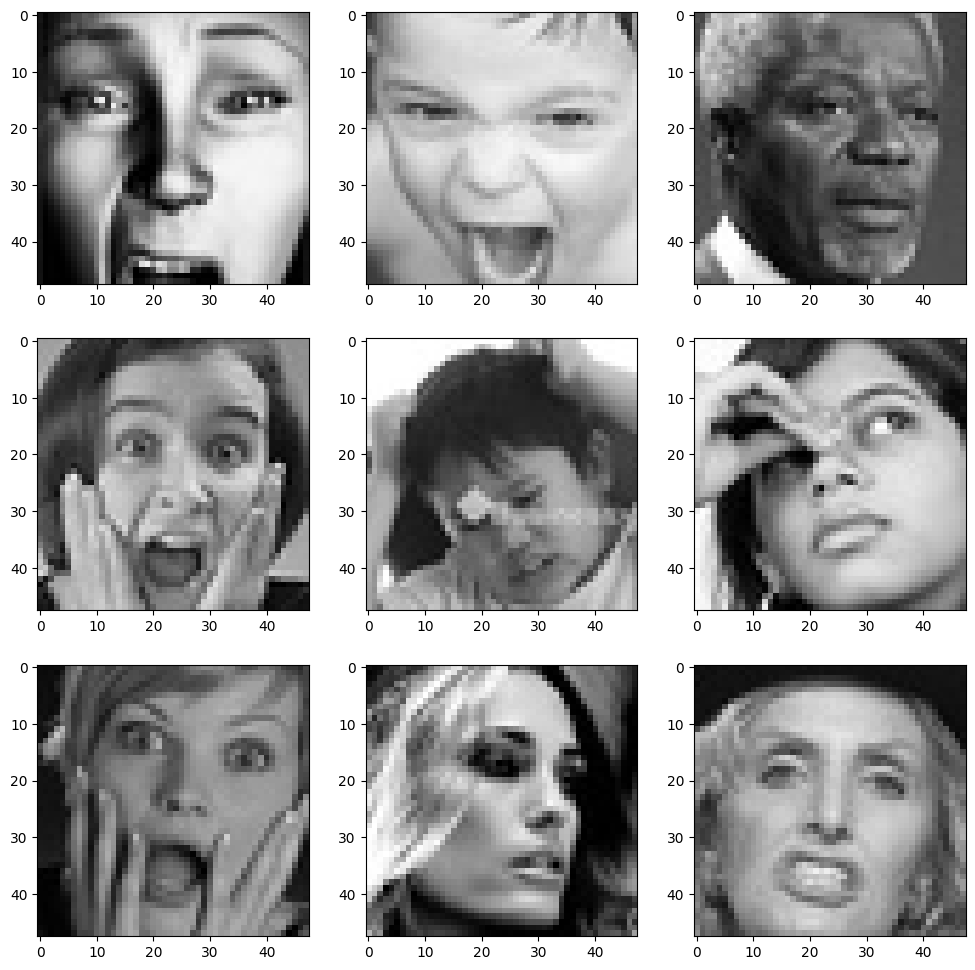

In [4]:
# Enter the Emotion that you want to see:
expression = 'fear'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# **Making Training and Validation Data using Data Augmentation**

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fer2013/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/fer2013/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# **Building the CNN Model**

In [6]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **An Overview of the CNN Architecture:**

![alt text](<CNN architecture.jpg>)

# **Fitting the Model with Training and Validation Data**

In [7]:
model.compile(
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
]

In [8]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1939 - loss: 2.4763
Epoch 1: val_accuracy improved from -inf to 0.24299, saving model to best_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.1940 - loss: 2.4757 - val_accuracy: 0.2430 - val_loss: 1.9566 - learning_rate: 0.0010
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2652 - loss: 1.8982
Epoch 2: val_accuracy improved from 0.24299 to 0.33753, saving model to best_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 64s 59ms/step - accuracy: 0.2652 - loss: 1.8981 - val_accuracy: 0.3375 - val_loss: 1.7060 - learning_rate: 0.0010
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3305 - loss: 1.7519
Epoch 3: val_accuracy improved from 0.33753 to 0.33810, saving model to best_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.3305 - loss: 1.7519 - val_accuracy: 0.3381 - val_loss: 1.8875 - learning_rate: 0.0010
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - ac

# **Plotting Accuracy & Loss Graphs**

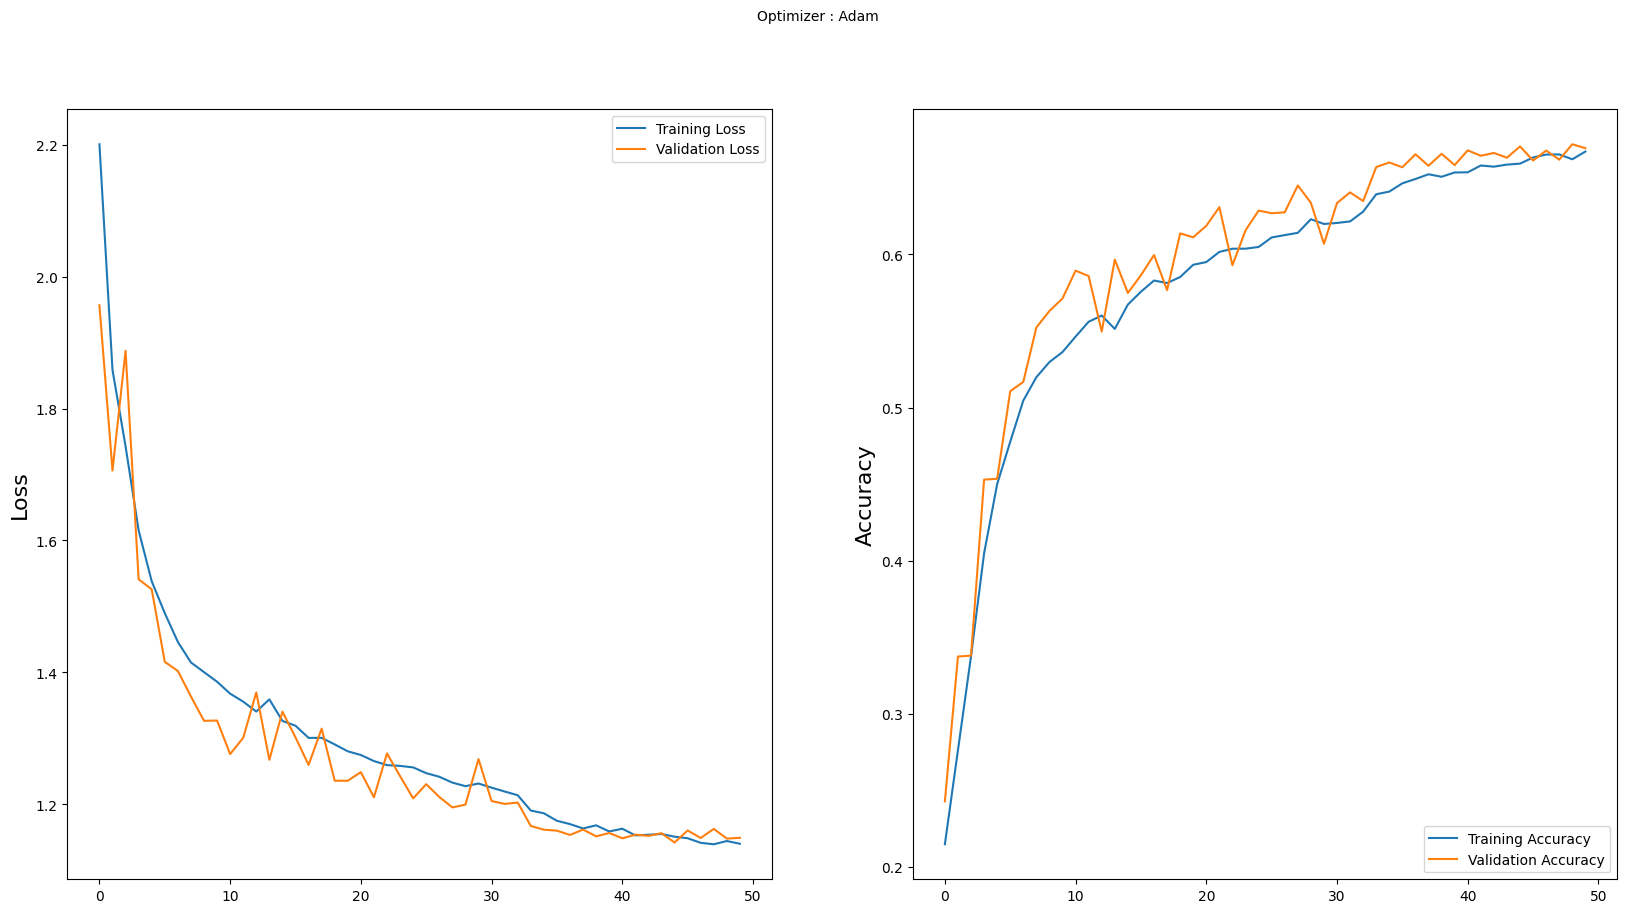

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()